In [1]:
from pyvf.resources.rotterdam2013 import *
from pyvf.plot import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import *
from functools import *
from itertools import *
import seaborn as sns
import time

In [80]:
pd.DataFrame(VF_THRESHOLD).groupby(VF_THRESHOLD_SITES).median().values.shape

(278, 54)

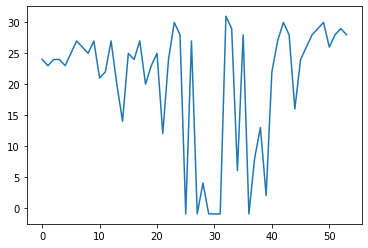

In [69]:
VF_THRESHOLD_BY_SITE = pd.DataFrame(VF_THRESHOLD).groupby(VF_THRESHOLD_SITES).median().values
plt.plot(VF_THRESHOLD_BY_SITE[0])

In [70]:
target = VF_THRESHOLD_BY_SITE[0]
target /= (target**2).sum()**0.5
database = VF_THRESHOLD_BY_SITE[1:]
database /= ((database**2).sum(axis=1, keepdims=True)**0.5)

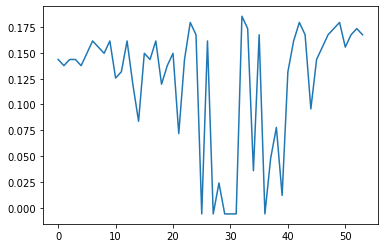

In [71]:
# pretty_print_vf(target, fmt="%.0f", apply_style=True)
plt.plot(target)

In [72]:
# Find the highest inner product
inner_product = database @ target

1.0026883

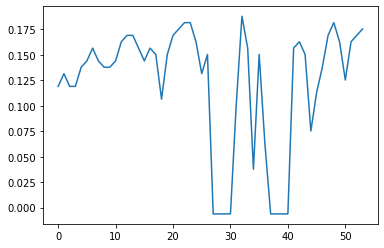

In [73]:
atom_i_0 = inner_product.argmax()
reconstruction = target.mean() / database[atom_i_0].mean() * database[atom_i_0]
# pretty_print_vf(database[inner_product.argmax()], fmt="%.0f", apply_style=True)
plt.plot(reconstruction)
target.mean() / database[atom_i_0].mean()

6.6227384e-09

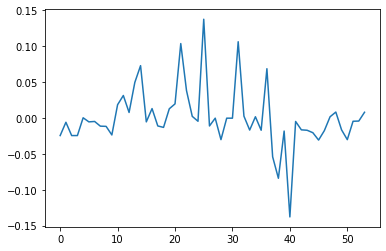

In [74]:
error = reconstruction - target
plt.plot(error)
error.mean()

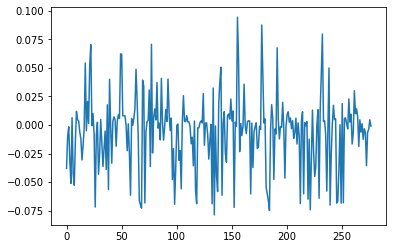

In [75]:
plt.plot(database @ error)

,-27.0,-21.0,-15.0,-9.0,-3.0,3.0,9.0,15.0,21.0,27.0
27.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
21.0,inf,inf,inf,-0.012434,-0.012434,-0.012434,0.037302,inf,inf,inf
15.0,inf,inf,-0.012434,-0.012434,-0.012434,0.149209,0.174078,0.124341,inf,inf
9.0,inf,-0.012434,0.024868,0.037302,0.161644,0.285985,0.261117,0.149209,0.074605,inf
3.0,-0.012434,-0.012434,0.049736,0.136775,0.360589,0.360589,0.348155,0.174078,0.037302,inf
-3.0,-0.012434,-0.012434,-0.012434,0.049736,0.298419,0.323287,0.273551,-0.012434,-0.012434,inf
-9.0,inf,-0.012434,-0.012434,0.012434,0.111907,0.049736,0.012434,-0.012434,-0.012434,inf
-15.0,inf,inf,-0.012434,-0.012434,-0.012434,-0.012434,-0.012434,-0.012434,inf,inf
-21.0,inf,inf,inf,-0.012434,-0.012434,-0.012434,-0.012434,inf,inf,inf
-27.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


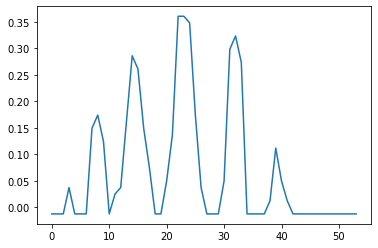

In [77]:
# plt.plot(database @ error)
atom_i_1 = (database @ error).argmax()
plt.plot(database[atom_i_1])
pretty_print_vf(database[atom_i_1])

In [63]:
X = database[[atom_i_0, atom_i_1]].T
y = target
reconstruction_coef = np.linalg.pinv(X) @ y
reconstruction = X @ reconstruction_coef

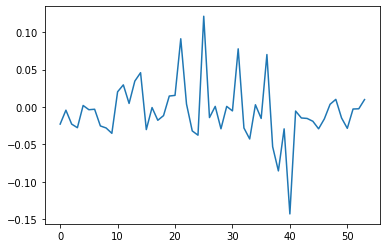

In [66]:
plt.plot(reconstruction - target)